# EDA Placeholder
Este notebook contém os passos sugeridos de análise exploratória:

- Plot da série temporal completa (rolling 7 e 30 dias)
- Decomposição STL (trend, seasonality, residuals)
- Boxplots por dia_da_semana e mês
- Comparação de vendas em dias promocionais e feriados
- ACF/PACF
- Verificação de qualidade dos dados (missing, duplicados, erros)

C:\Users\maria\AppData\Local\Temp\ipykernel_11308\382418016.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df['vendas'].resample('M').mean()


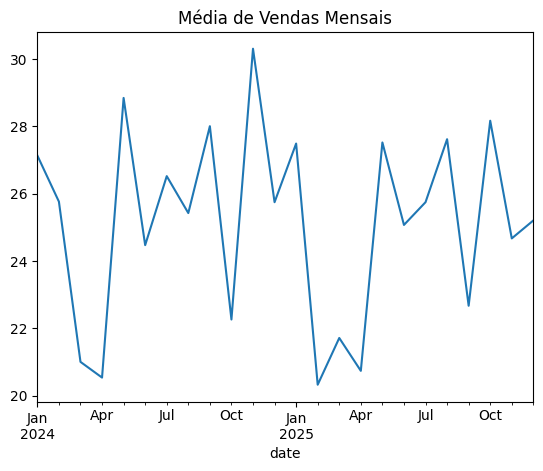

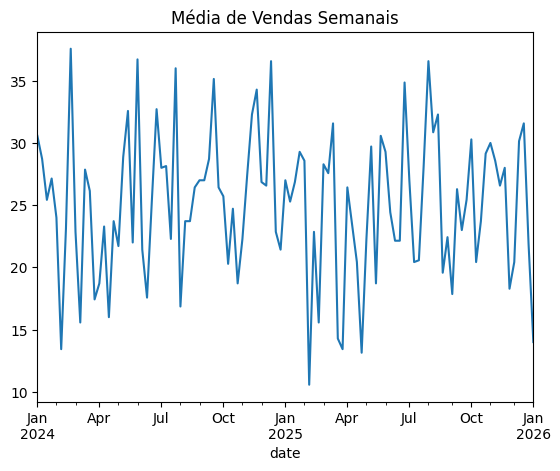

C:\Users\maria\AppData\Local\Temp\ipykernel_11308\382418016.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df['vendas'].resample('M').mean()


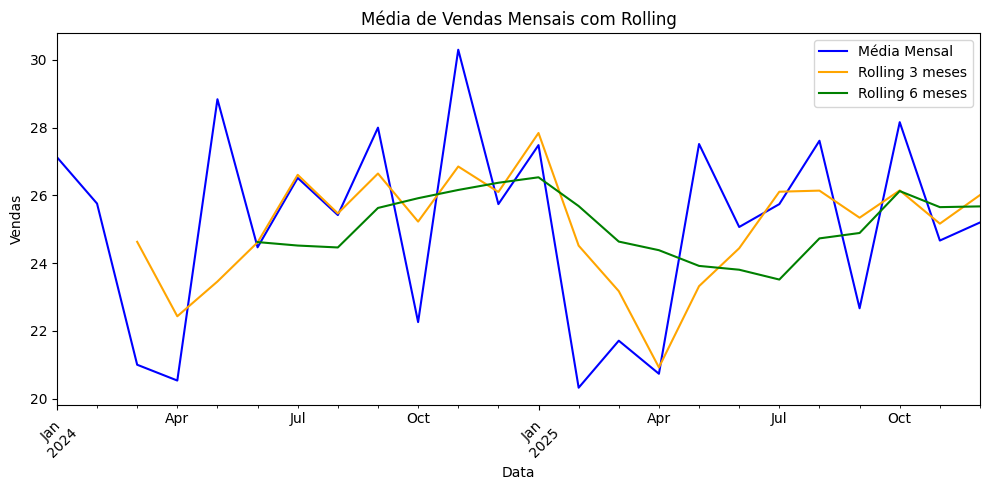

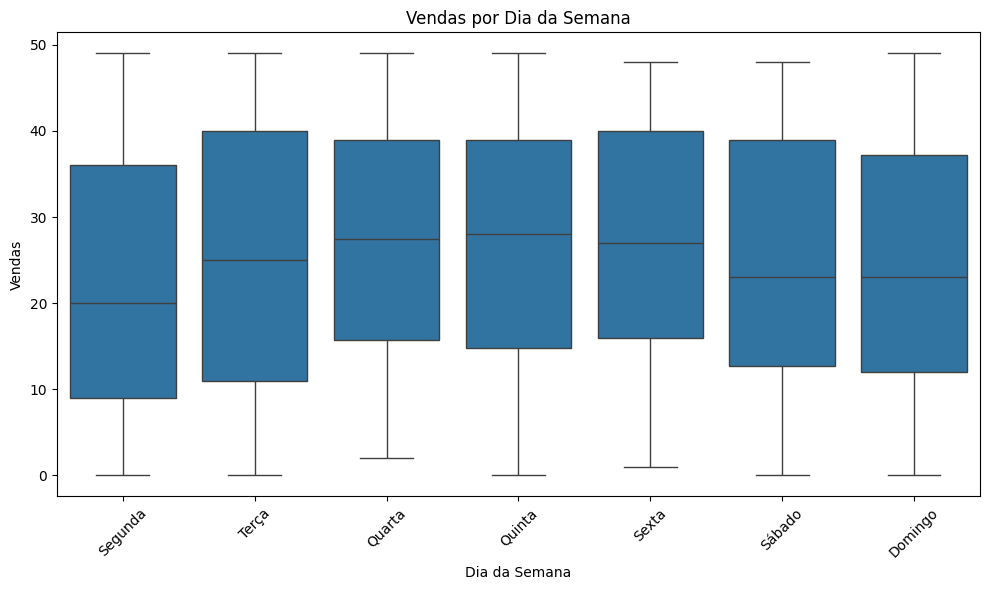

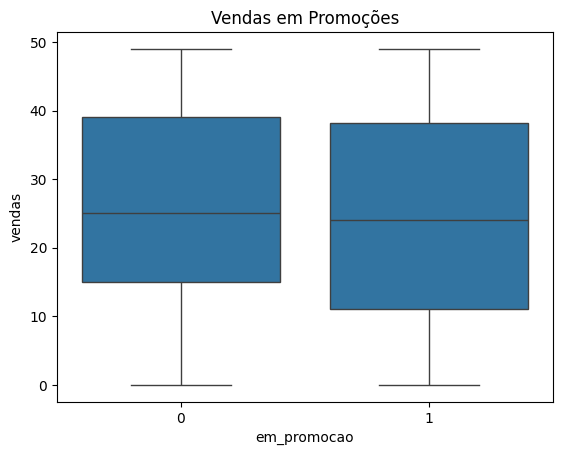

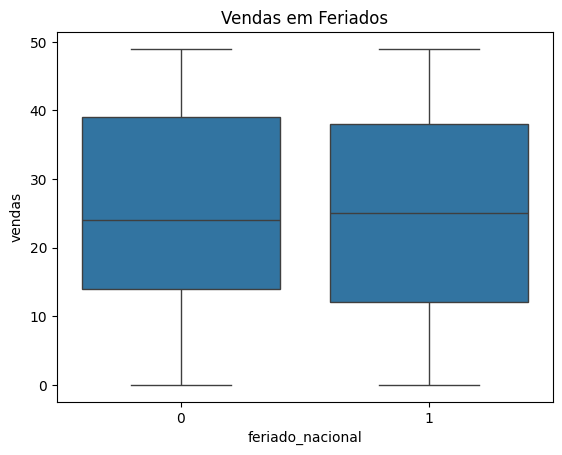

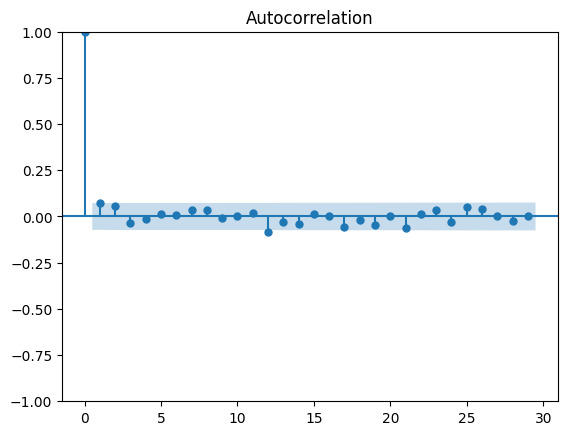

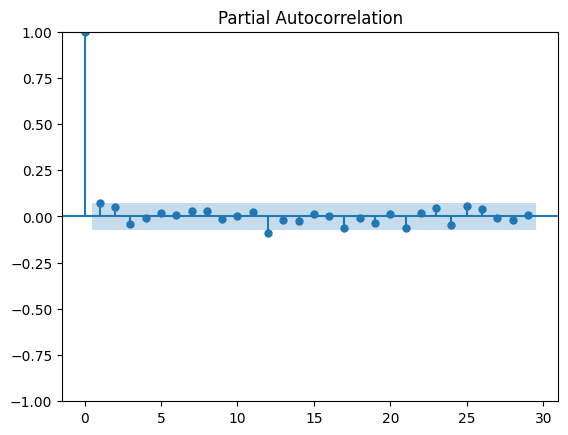

In [13]:
# EDA placeholder usando dados simulados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar dados simulados
dates = pd.date_range(start='2024-01-01', periods=730)
df = pd.DataFrame({
    'date': dates,
    'vendas': np.random.randint(0, 50, size=730),
    'dia_da_semana': dates.weekday,
    'em_promocao': np.random.choice([0,1], size=730),
    'feriado_nacional': np.random.choice([0,1], size=730)
})

# Convert date para datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Criar quartis
df['quartil_vendas'] = pd.qcut(df['vendas'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Agrupar por mês
df_mensal = df['vendas'].resample('M').mean()
df_mensal.plot(title='Média de Vendas Mensais')
plt.show()

df_semanal = df['vendas'].resample('W').mean()
df_semanal.plot(title='Média de Vendas Semanais')
plt.show()

# Agrupar por mês
df_mensal = df['vendas'].resample('M').mean()

# Aplicar médias móveis de 3 e 6 meses
df_mensal_rolling_3 = df_mensal.rolling(window=3).mean()
df_mensal_rolling_6 = df_mensal.rolling(window=6).mean()

# Plotar tudo junto
plt.figure(figsize=(10,5))
df_mensal.plot(label='Média Mensal', color='blue')
df_mensal_rolling_3.plot(label='Rolling 3 meses', color='orange')
df_mensal_rolling_6.plot(label='Rolling 6 meses', color='green')
plt.title('Média de Vendas Mensais com Rolling')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Boxplot por dia da semana
# Mapear números para nomes dos dias
dias_semana = {
    0: 'Segunda',
    1: 'Terça',
    2: 'Quarta',
    3: 'Quinta',
    4: 'Sexta',
    5: 'Sábado',
    6: 'Domingo'
}

df['dia_da_semana_nome'] = df['dia_da_semana'].map(dias_semana)

# Boxplot com nomes dos dias
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='dia_da_semana_nome', y='vendas')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Promoções e feriados
df['em_promocao_nome'] = df['em_promocao'].map({0: 'Não', 1: 'Sim'})
sns.boxplot(x='em_promocao', y='vendas', data=df.reset_index())
plt.title('Vendas em Promoções')
plt.show()

df['feriado_nacional_nome'] = df['feriado_nacional'].map({0: 'Não', 1: 'Sim'})
sns.boxplot(x='feriado_nacional', y='vendas', data=df.reset_index())
plt.title('Vendas em Feriados')
plt.show()

# 5. Autocorrelação
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['vendas'])
plt.show()
plot_pacf(df['vendas'])
plt.show()


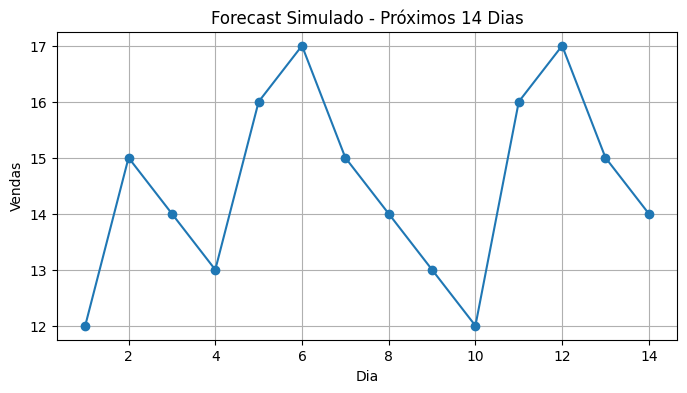

In [14]:
import matplotlib.pyplot as plt

forecast = [12, 15, 14, 13, 16, 17, 15, 14, 13, 12, 16, 17, 15, 14]
plt.figure(figsize=(8,4))
plt.plot(range(1,15), forecast, marker='o', linestyle='-')
plt.title("Forecast Simulado - Próximos 14 Dias")
plt.xlabel("Dia")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()
